In [1]:
import seabreeze
seabreeze.use('pyseabreeze')
from seabreeze.spectrometers import list_devices, Spectrometer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import savetxt
from scipy import interpolate
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

In [2]:
spec = Spectrometer.from_first_available()

In [3]:
spec.integration_time_micros(1500000) # Manually select an integration time (trial and error)

In [4]:
def scan_to_average(scans):
    intensities = []
    for i in np.arange(scans+1):
        intensities.append(spec.intensities())
        
        return intensities
    
scans = 1000
    
spectra = np.mean(scan_to_average(scans), axis = 0)[50::5]

In [5]:
wavelengths = spec.wavelengths()[50::5]

In [6]:
spec.close()

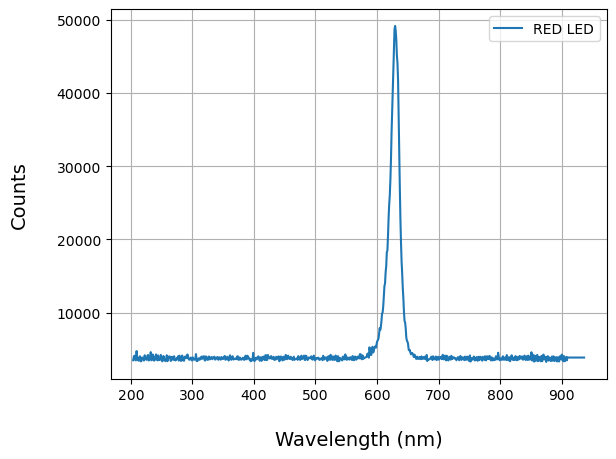

In [7]:
plt.plot(wavelengths, spectra, label = 'RED LED')
plt.grid()
plt.ylabel('Counts\n', fontsize = 14)
plt.xlabel('\nWavelength (nm)', fontsize = 14)
plt.legend()
plt.show()

In [8]:
new_spectra = np.interp(np.arange(400, 701, 5), wavelengths, spectra)
resampled = np.column_stack((np.arange(400, 701, 5), new_spectra))
wl, rad = resampled[:,0], ((resampled[:, 1])/np.amax(resampled[:, 1]) - 0.07)/(np.amax(((resampled[:, 1])/np.amax(resampled[:, 1]) - 0.07)))

df = pd.DataFrame({"wavelength": wl, "radiance": rad})
df.to_csv("LED.csv", index = False)

In [9]:
wl[np.argmax(rad)]

630.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


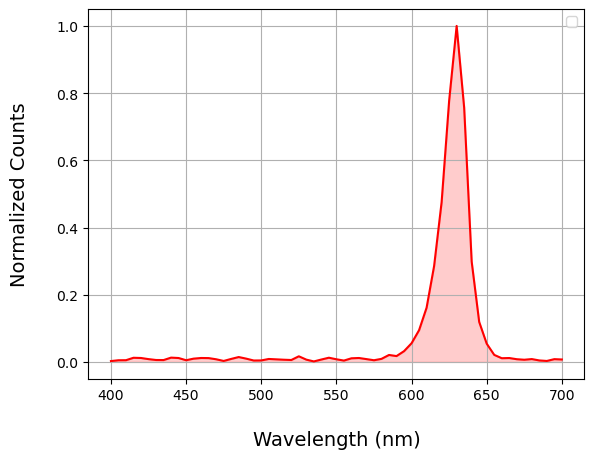

In [10]:
plt.plot(wl, rad, c='r')
plt.fill_between(wl, rad, color='red', alpha=0.2)
plt.grid()
plt.ylabel('Normalized Counts\n', fontsize = 14)
plt.xlabel('\nWavelength (nm)', fontsize = 14)
plt.savefig('demo.png', transparent=True)
plt.show()